In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [18]:
titanic = pd.read_csv('titanic/train.csv')

In [6]:
print(titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


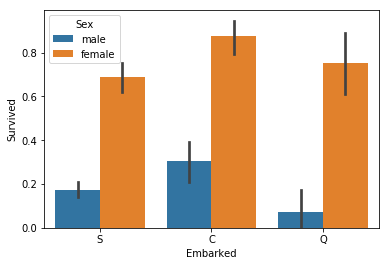

In [7]:
sns.barplot(x = "Embarked", y = "Survived", hue = "Sex", data = titanic)

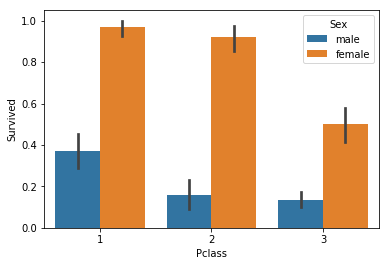

In [8]:
sns.barplot(x = "Pclass", y = "Survived", hue = "Sex", data = titanic)

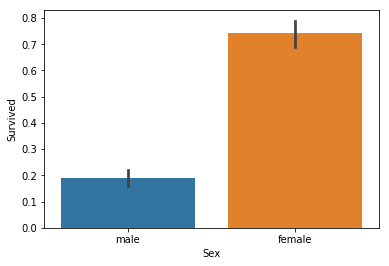

In [9]:
sns.barplot(x = "Sex", y = "Survived", data = titanic)

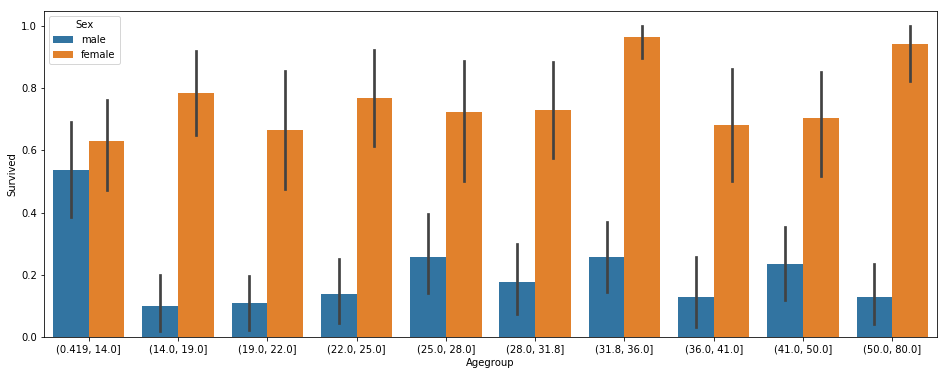

In [10]:
fig, ax = plt.subplots(figsize=(16,6))
titanic['Agegroup'] = pd.qcut(titanic['Age'], 10)
sns.barplot(x = "Agegroup", y = "Survived", hue = "Sex", data = titanic, ax=ax)
plt.show()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare  ... Embarked          Faregroup Company  \
0      0         A/5 21171   7.2500  ...        S    (-0.001, 7.854]       1   
1      0          PC 17599  71.2833  ...        C  (39.688, 512.329]       1   
2      0  STON/O2. 3101282   7.9250  ...        S      (7.854, 10.5]       0   


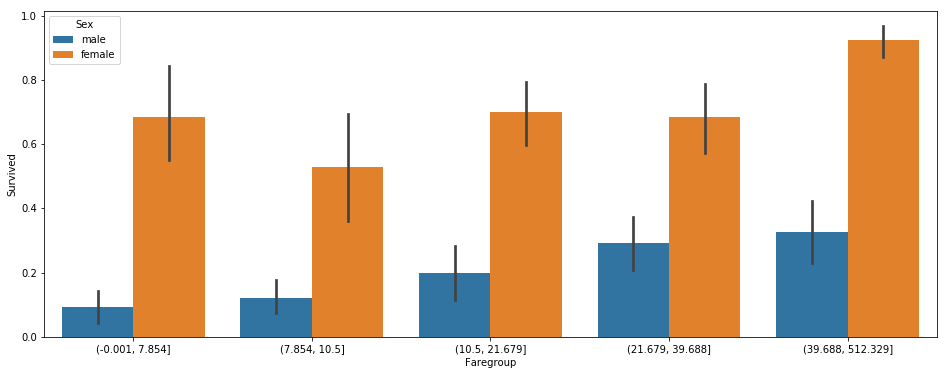

In [55]:
def categorize_fare(df):
#     bins = (0, 10, 20, 30, 40, 50, 100, 200, 600)
    df["Faregroup"] = pd.qcut(df.Fare, 5)
    
categorize_fare(titanic)
print(titanic.head())
fig, ax = plt.subplots(figsize = (16,6))
sns.barplot(x = "Faregroup", y="Survived", hue="Sex", data=titanic, ax=ax)
plt.show()

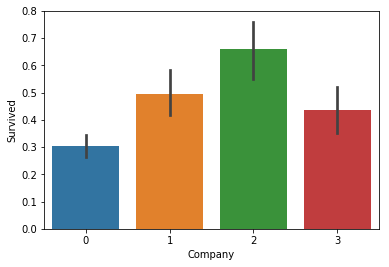

In [21]:
def categorize_company(df):
    conditions = [(df.Parch + df.SibSp == 0), (df.Parch == 0) & (df.SibSp > 0), (df.Parch > 0) & (df.SibSp ==0),
                  (df.Parch > 0) & (df.SibSp > 0)]
    categories = [0, 1, 2, 3]
    df["Company"] = np.select(conditions, categories)
    df["Alone"] = np.where(df.Parch + df.SibSp > 0, 0, 1)
        
categorize_company(titanic)

sns.barplot(x = "Company", y = "Survived", data = titanic)
# sns.countplot(x = "Company", hue = "Agegroup", data = titanic)
# sns.barplot(x = "Alone", y = "Survived", hue = "Agegroup", data = titanic)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare  ... Embarked          Faregroup Company  \
0      0         A/5 21171   7.2500  ...        S    (-0.001, 7.854]       1   
1      0          PC 17599  71.2833  ...        C  (39.688, 512.329]       1   
2      0  STON/O2. 3101282   7.9250  ...        S      (7.854, 10.5]       0   


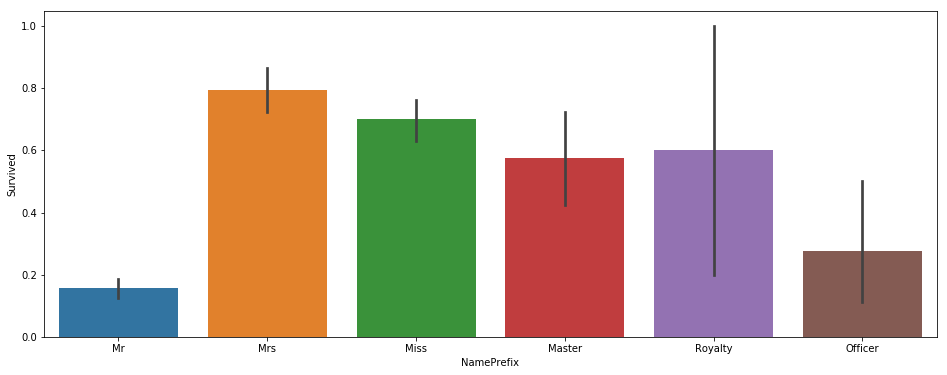

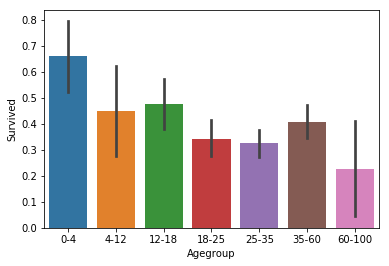

In [83]:
def format_name(df):
    df['Lname'] = df.Name.apply(lambda x: x.split(', ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(', ')[1])
    df['NamePrefix'] = df.NamePrefix.apply(lambda x: x.split(' ')[0].split('.')[0].strip())
    normalized_titles = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the":        "Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"
    }
    df["NamePrefix"] = titanic.NamePrefix.map(normalized_titles)
    return df   



format_name(titanic)
print(titanic.head())
fig, ax = plt.subplots(figsize = (16, 6))
# sns.countplot(x = "NamePrefix", data=titanic, ax=ax)
sns.barplot(x = "NamePrefix", y = "Survived", data = titanic, ax=ax)
plt.show()



def categorize_age(df):
    specAge = titanic.groupby(["Sex", "Pclass", "NamePrefix"])
    specAge.Age.median()
    titanic.Age = specAge.Age.apply(lambda x: x.fillna(x.median()))
    bins = (0, 4, 12, 18, 25, 35, 60, 100)
    agename = ["0-4", "4-12", "12-18", "18-25", "25-35", "35-60", "60-100"]
    df["Agegroup"] = pd.cut(df.Age, bins, labels = agename)
    
categorize_age(titanic)

sns.barplot(x = "Agegroup", y = "Survived", data = titanic)

In [51]:
def drop_attributes(df):
    return df.drop(['Ticket', 'Name', 'Cabin'], axis=1)

drop_attributes(titanic)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Faregroup,Company,Alone,Lname,NamePrefix,Agegroup,Gen_pred,Pred,Correct
0,1,0,3,male,22.0,1,0,7.2500,S,"(0, 10]",1,0,Braund,Mr,18-25,0,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,"(50, 100]",1,0,Cumings,Mrs,35-60,1,0,0
2,3,1,3,female,26.0,0,0,7.9250,S,"(0, 10]",0,1,Heikkinen,Miss,25-35,1,0,0
3,4,1,1,female,35.0,1,0,53.1000,S,"(50, 100]",1,0,Futrelle,Mrs,25-35,1,0,0
4,5,0,3,male,35.0,0,0,8.0500,S,"(0, 10]",0,1,Allen,Mr,25-35,0,0,1
5,6,0,3,male,26.0,0,0,8.4583,Q,"(0, 10]",0,1,Moran,Mr,25-35,0,0,1
6,7,0,1,male,54.0,0,0,51.8625,S,"(50, 100]",0,1,McCarthy,Mr,35-60,0,0,1
7,8,0,3,male,2.0,3,1,21.0750,S,"(20, 30]",3,0,Palsson,Master,0-4,0,0,1
8,9,1,3,female,27.0,0,2,11.1333,S,"(10, 20]",2,0,Johnson,Mrs,25-35,1,1,1
9,10,1,2,female,14.0,1,0,30.0708,C,"(30, 40]",1,0,Nasser,Mrs,12-18,1,0,0


Num correct gender prediction 701
Num correct class prediction 605
Num correct company prediction 571
Num correct age prediction 563


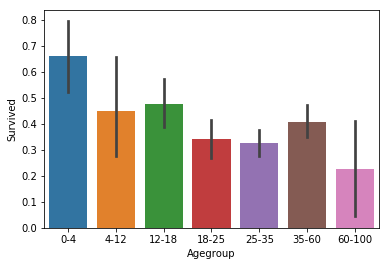

In [103]:
def gender_prediction(df):
    df["Pred"] = np.where(df["Sex"] == "female", 1, 0)
    
# sns.barplot(x = "Pclass", y = "Survived", data = titanic)
sns.barplot(x = "Agegroup", y = "Survived", data = titanic)

def class_prediction(df):
    df["Pred"] = np.where(df["Pclass"] > 1, 0, 1)
    
def company_prediction(df):
    df["Pred"] = np.where((df["Company"] == 2) | (df["Company"] == 1), 1, 0)
    
def age_prediction(df):
    df["Pred"] = np.where(df["Agegroup"] == "0-4", 1, 0)
    
def check_prediction(df):
    df["Correct"] = np.where(df.Pred == df.Survived, 1, 0)
    return df["Correct"].sum()



    
gender_prediction(titanic)
cor = check_prediction(titanic)
print("Num correct gender prediction", cor)

class_prediction(titanic)
cor = check_prediction(titanic)
print("Num correct class prediction", cor)

company_prediction(titanic)
cor = check_prediction(titanic)
print("Num correct company prediction", cor)

age_prediction(titanic)
cor = check_prediction(titanic)
print("Num correct age prediction", cor)

     PassengerId  Survived  Pclass  \
7              8         0       3   
16            17         0       3   
50            51         0       3   
59            60         0       3   
63            64         0       3   
65            66         1       3   
159          160         0       3   
164          165         0       3   
171          172         0       3   
176          177         0       3   
182          183         0       3   
183          184         1       2   
193          194         1       2   
261          262         1       3   
278          279         0       3   
305          306         1       1   
340          341         1       2   
348          349         1       3   
386          387         0       3   
407          408         1       2   
480          481         0       3   
489          490         1       3   
549          550         1       2   
709          710         1       3   
755          756         1       2   
787         

C:\Users\tessa\Miniconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\tessa\Miniconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\tessa\Miniconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#

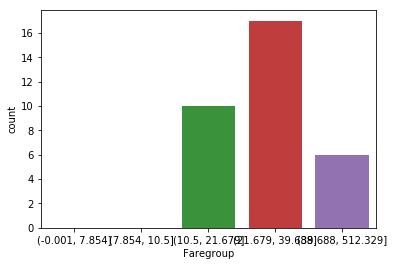

In [113]:
maleData = titanic[titanic["Sex"] == "male"]
femaleData = titanic[titanic["Sex"] == "female"]
youngMales = maleData[maleData["Age"] <= 12]
youngMalesFamily = youngMales[youngMales["Company"] == 3]
print(youngMalesFamily)

sns.countplot(x = "Faregroup", data = youngMalesFamily)
# sns.barplot(x = "Faregroup", y = "Survived", data = youngMalesFamily)

age_prediction(maleData)
cor = check_prediction(maleData)
print("Num correct age prediction", cor)

company_prediction(youngMales)
cor = check_prediction(youngMales)
print("Num correct company prediction", cor)

def title_prediction(df):
    df["Pred"] = np.where(df["NamePrefix"] == "Master", 1, 0)
    
title_prediction(maleData)
cor = check_prediction(maleData)
print("Num correct title prediction", cor)